<center><font size=10>Data Science and Engineering</center></font>
<center><font size=6>DATA DRIVEN PHILANTHROPY APPROACH TO FUND ALLOCATION TO HELP INTERNATIONAL NGO </center></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import  silhouette_samples,silhouette_score
from sklearn.metrics import euclidean_distances
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import random
from statsmodels.stats.outliers_influence import variance_inflation_factor



from warnings import filterwarnings
filterwarnings('ignore')
np.set_printoptions(suppress=True)

PROBLEM STATEMENT

* Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
* About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
* Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
	


**ATTRIBUTES**

Column Name	Description
* country-Name of the country
* child_mort-Death of children under 5 years of age per 1000 live births
* exports-Exports of goods and services per capita. Given as %age of the GDP per capita
* health-Total health spending per capita. Given as %age of GDP per capita
* imports-Imports of goods and services per capita. Given as %age of the GDP per capita
* Income-Net income per person
* Inflation-The measurement of the annual growth rate of the Total GDP
* life_expec-The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer-The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp-The GDP per capita. Calculated as the Total GDP divided by the total population.


**READ DATA**

In [2]:
data=pd.read_csv('Country-data.csv')

**index**

In [3]:
data.set_index('country',inplace=True)

In [4]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


# DATA EXPLORATION

In [5]:
print('NO OF COUNTRIES:',data.shape[0])

NO OF COUNTRIES: 167


**FIVE POINT SUMMARY**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [7]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### RELATION BETWEEN THE FEATURES

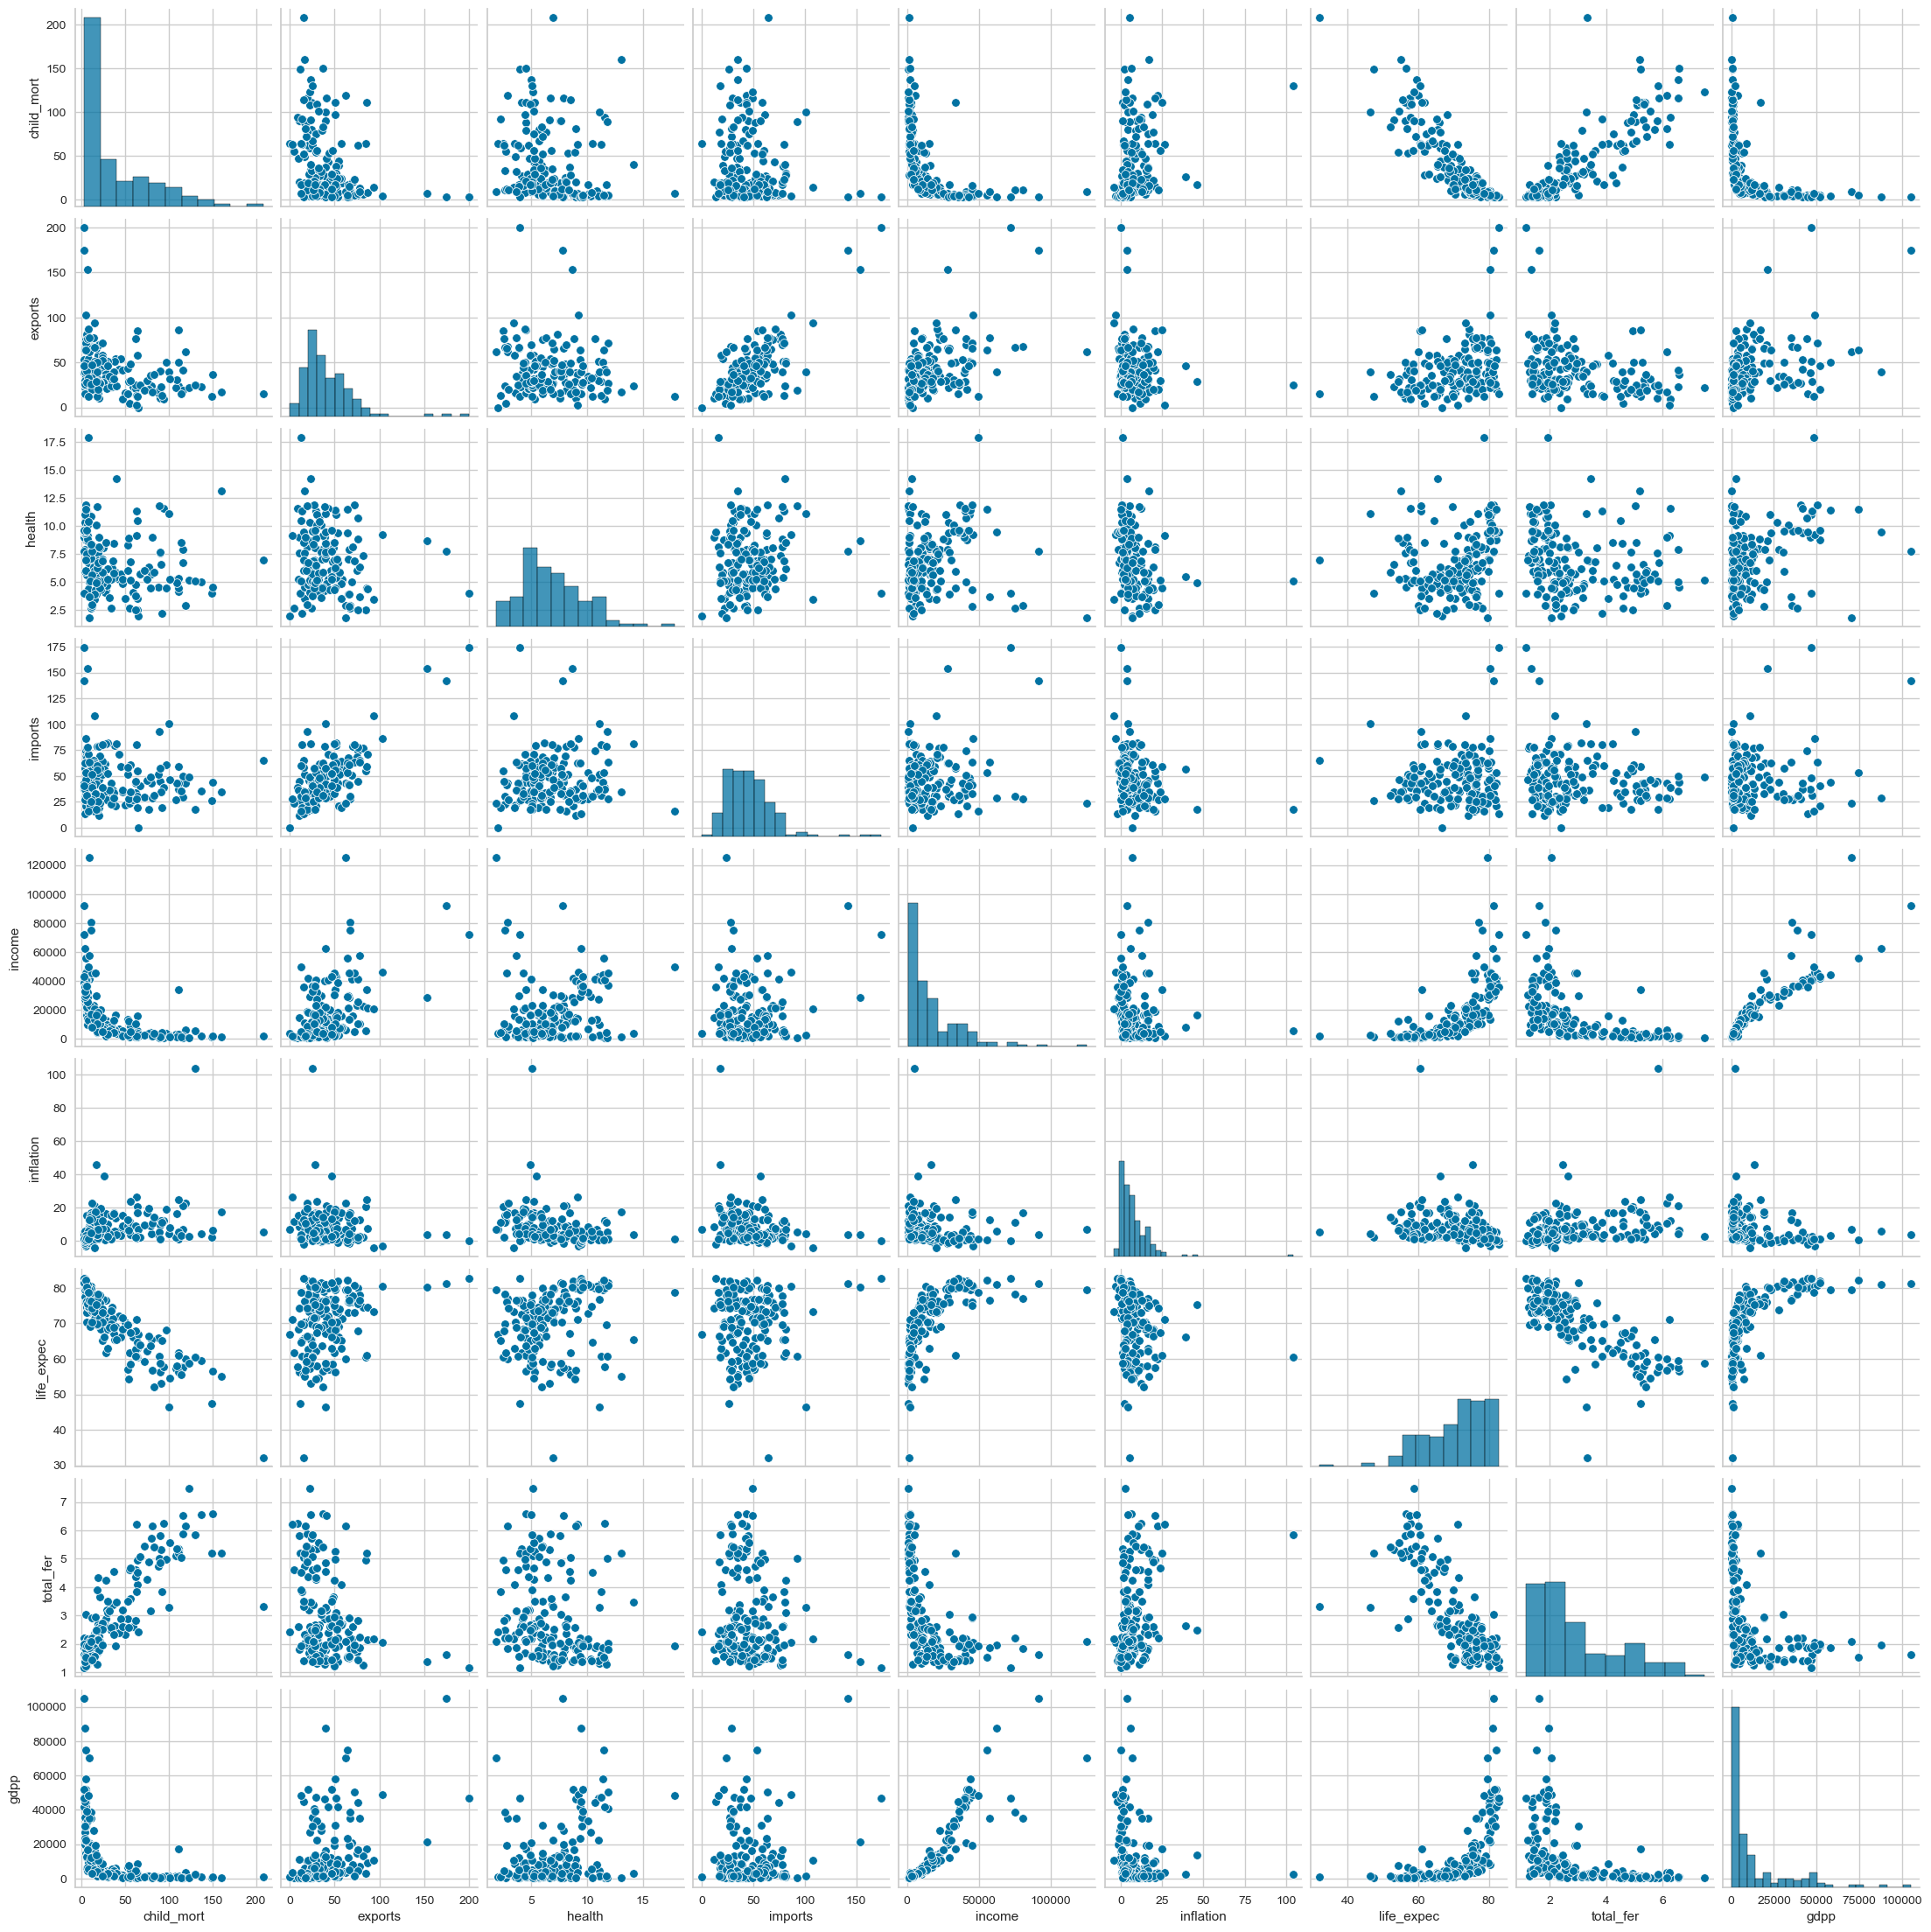

In [8]:
sns.pairplot(data)
plt.xlabel(xlabel=data.columns,fontsize=25)
plt.show()

**INFERENCES**

* `Linear Relationships`: There are apparent linear relationships in pairs such as (income, life_expec) and (gdpp, income), indicating that increases in GDP per capita and income are associated with increases in life expectancy, suggesting economic prosperity's impact on health and longevity.

* `Non-linear Relationships`: Pairs like (child_mort, life_expec) and (total_fer, life_expec) show non-linear relationships, indicating that as child mortality and fertility rates decrease, life expectancy tends to increase, but not in a strictly linear fashion.

* `Normal and Non-normal Distributions`: The histograms for variables like inflation and child_mort display non-normal distributions with significant skewness. In contrast, variables such as income and gdpp might also show skewness towards higher values, indicating wealth accumulation in fewer countries.

* `Outliers`: Scatter plots involving gdpp and income suggest the presence of outliers, where some countries have significantly higher GDP per capita or income levels compared to others.

* `Variable Scale Differences`: There is a wide variation in scales among variables, particularly between economic measures like income and gdpp compared to health statistics such as child_mort and life_expec. This suggests that normalization might be required to compare these effectively.

* `Density Patterns`: The density plots for life_expec and total_fer indicate different degrees of skewness and potential bimodal distributions, implying diverse demographic profiles across the dataset.

* `Clusters and Gaps`: The scatter plots reveal potential clustering, especially in variables like life_expec and child_mort, indicating groups of countries with similar health outcomes and challenges.

# CORRELATION PLOT

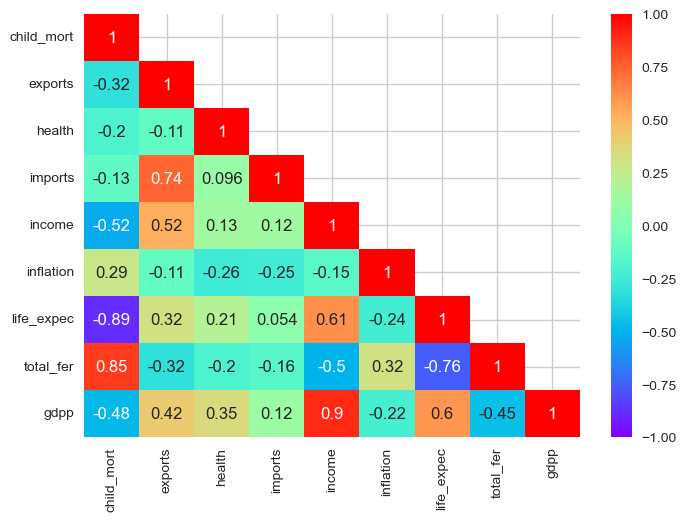

In [9]:
sns.heatmap(data=data.corr(),annot=True,vmin=-1,vmax=1,cmap='rainbow',mask=np.triu(data.corr(),k=1))
plt.show()

**INFERENCES**
* `life_exp` and `child_mort` & `life_exp` and  `total_fer` is **Inversaly correlated**
* `GDPP` and `INCOME` is stongly **POSITIVELY-CORRELATED**
* `INCOME` and `export` & `IMPORT`and `EXPORT` are **POSITIVELY CORRELATED**

## UNIVARIENT ANALYSIS

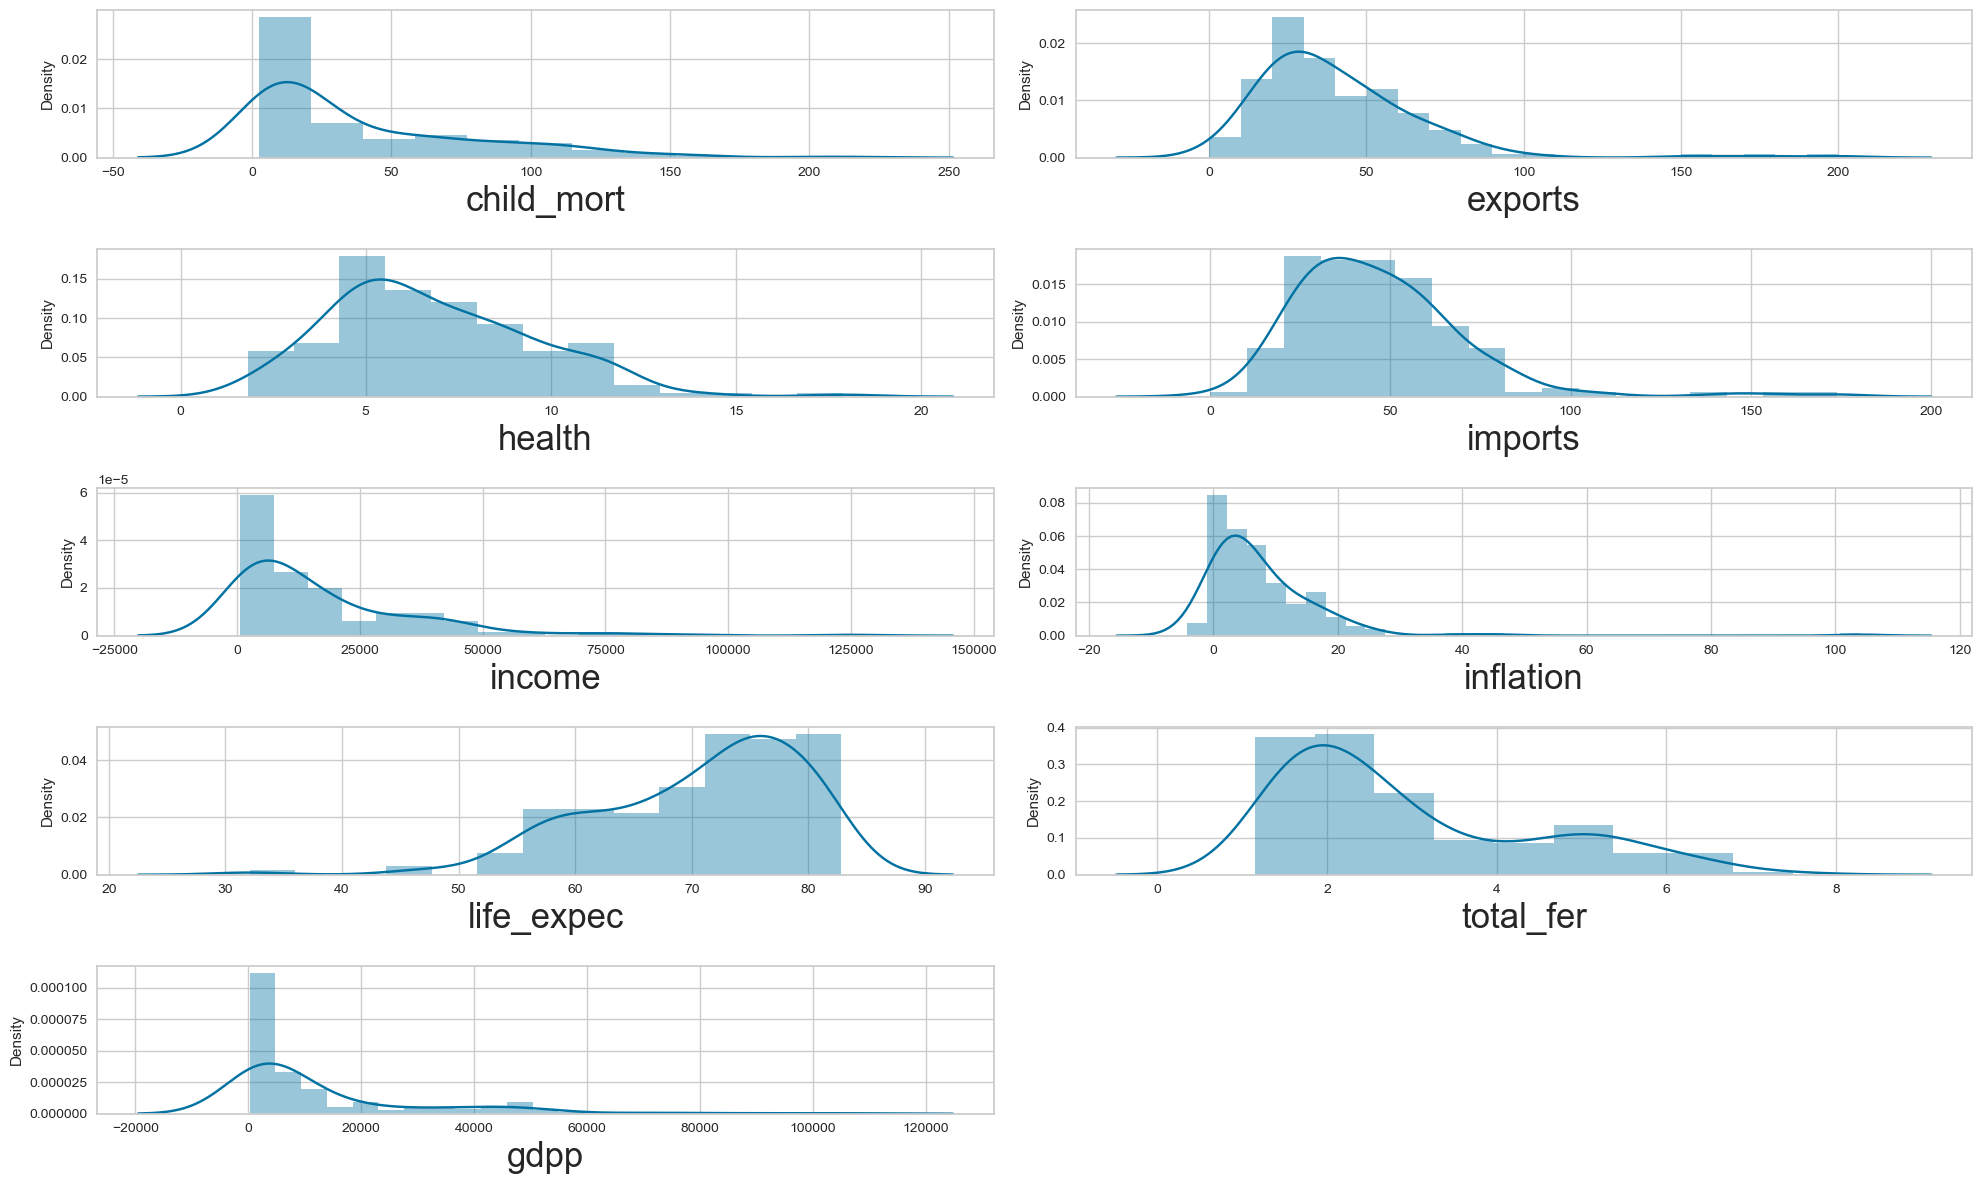

In [10]:
t=1
plt.figure(figsize=[20,12])
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.xlabel(xlabel=i,fontsize=25)
    t+=1
plt.tight_layout()
plt.show()

#### OUTLIERS CHECKING USING BOXPLOT

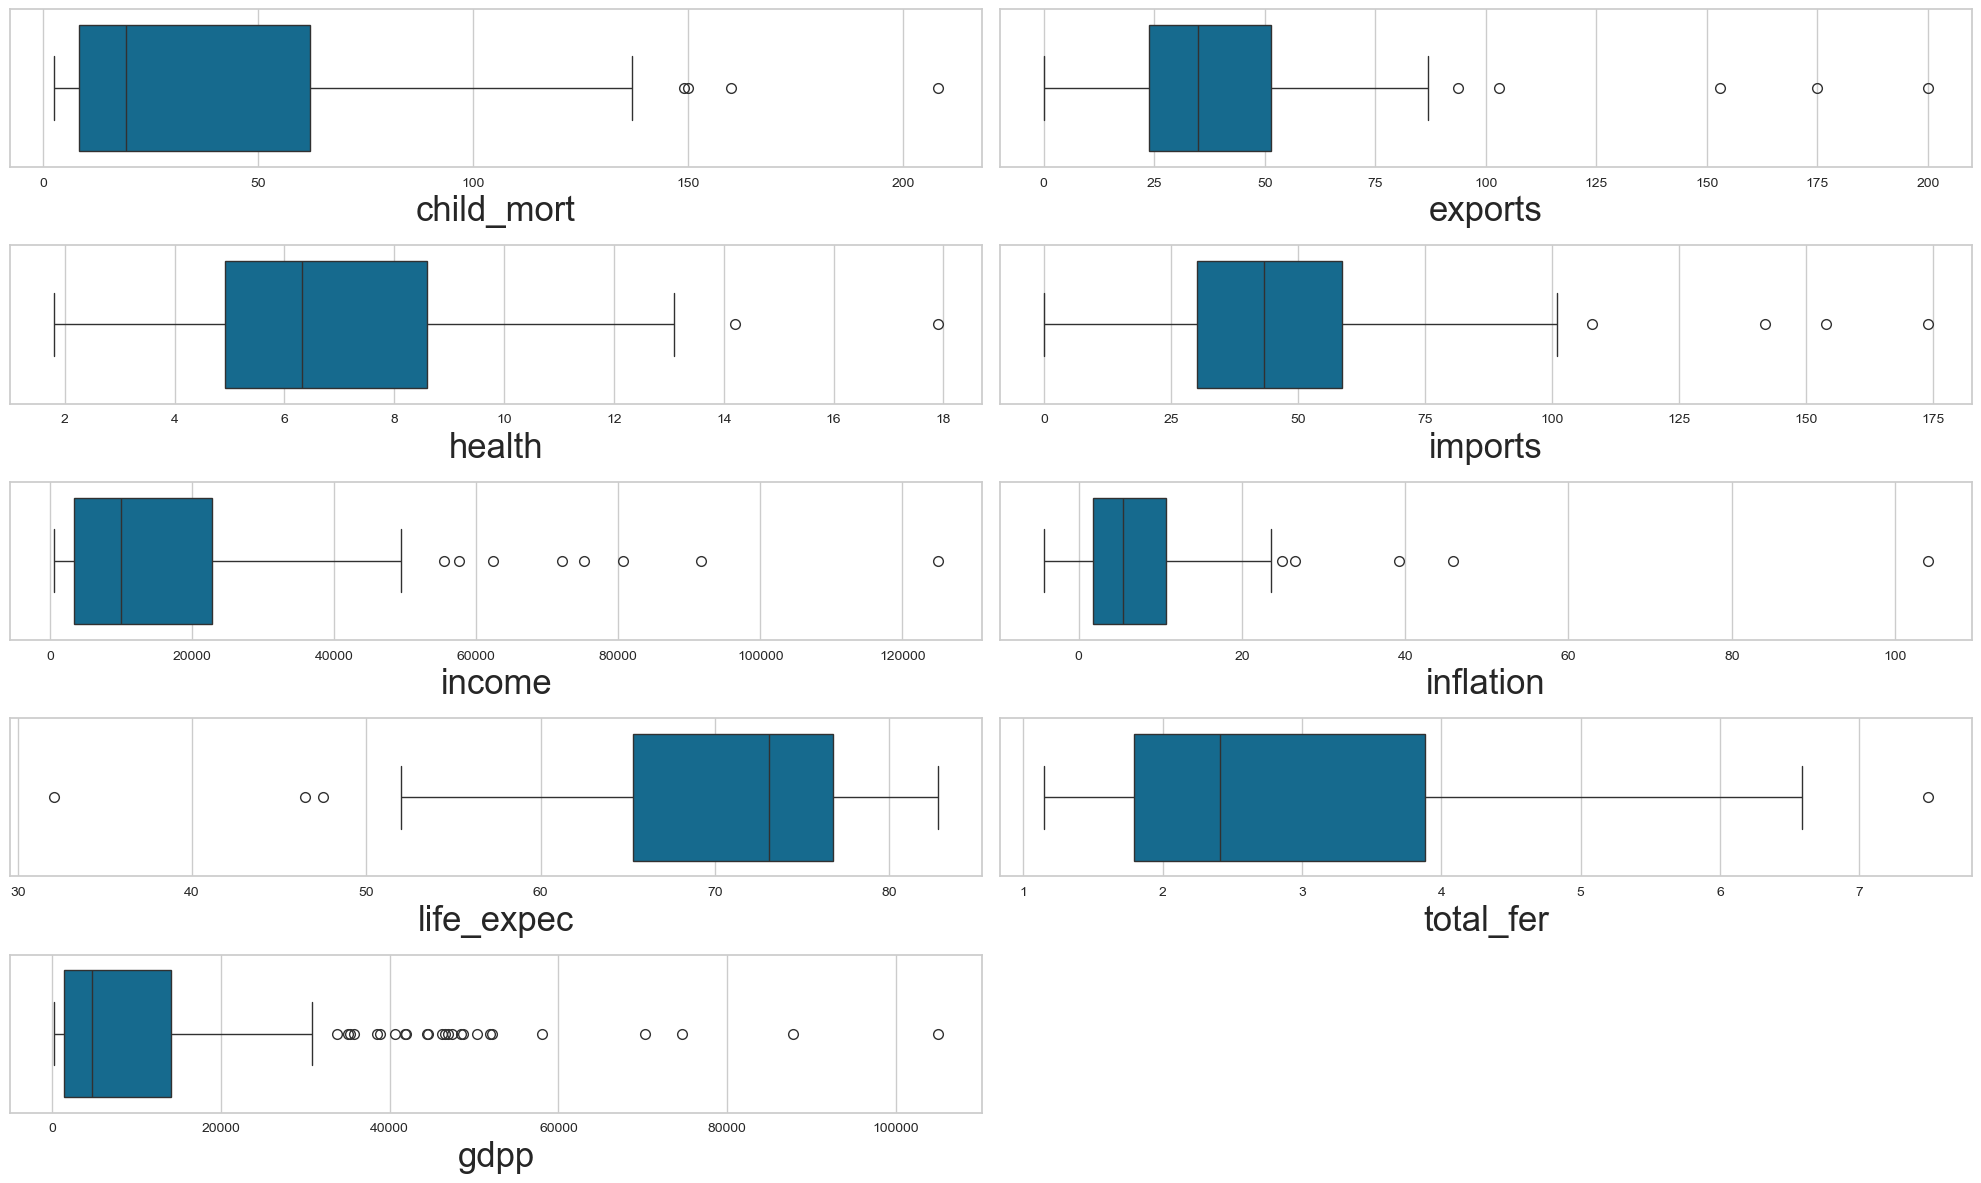

In [11]:
t=1
plt.figure(figsize=[20,12])
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data[i],orient='h')
    plt.xlabel(xlabel=i,fontsize=25)
    t+=1
plt.tight_layout()
plt.show()

## CLEAN DATA

**NULL VALUES**

In [12]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**DUPLICATE CHECKING**

In [13]:
data.duplicated().sum()

0

**THERE ARE `NO MISSING` VALUES AND `NO DUPLICATED` VALUES**

## WE HAVE TO CAP THE OUTLIERS

In [14]:
for i in data.columns:
    q1,q3=np.percentile(data[i],[25,75])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

**CHECK THE BOX PLOT OF CAPPED OUTLIERS**

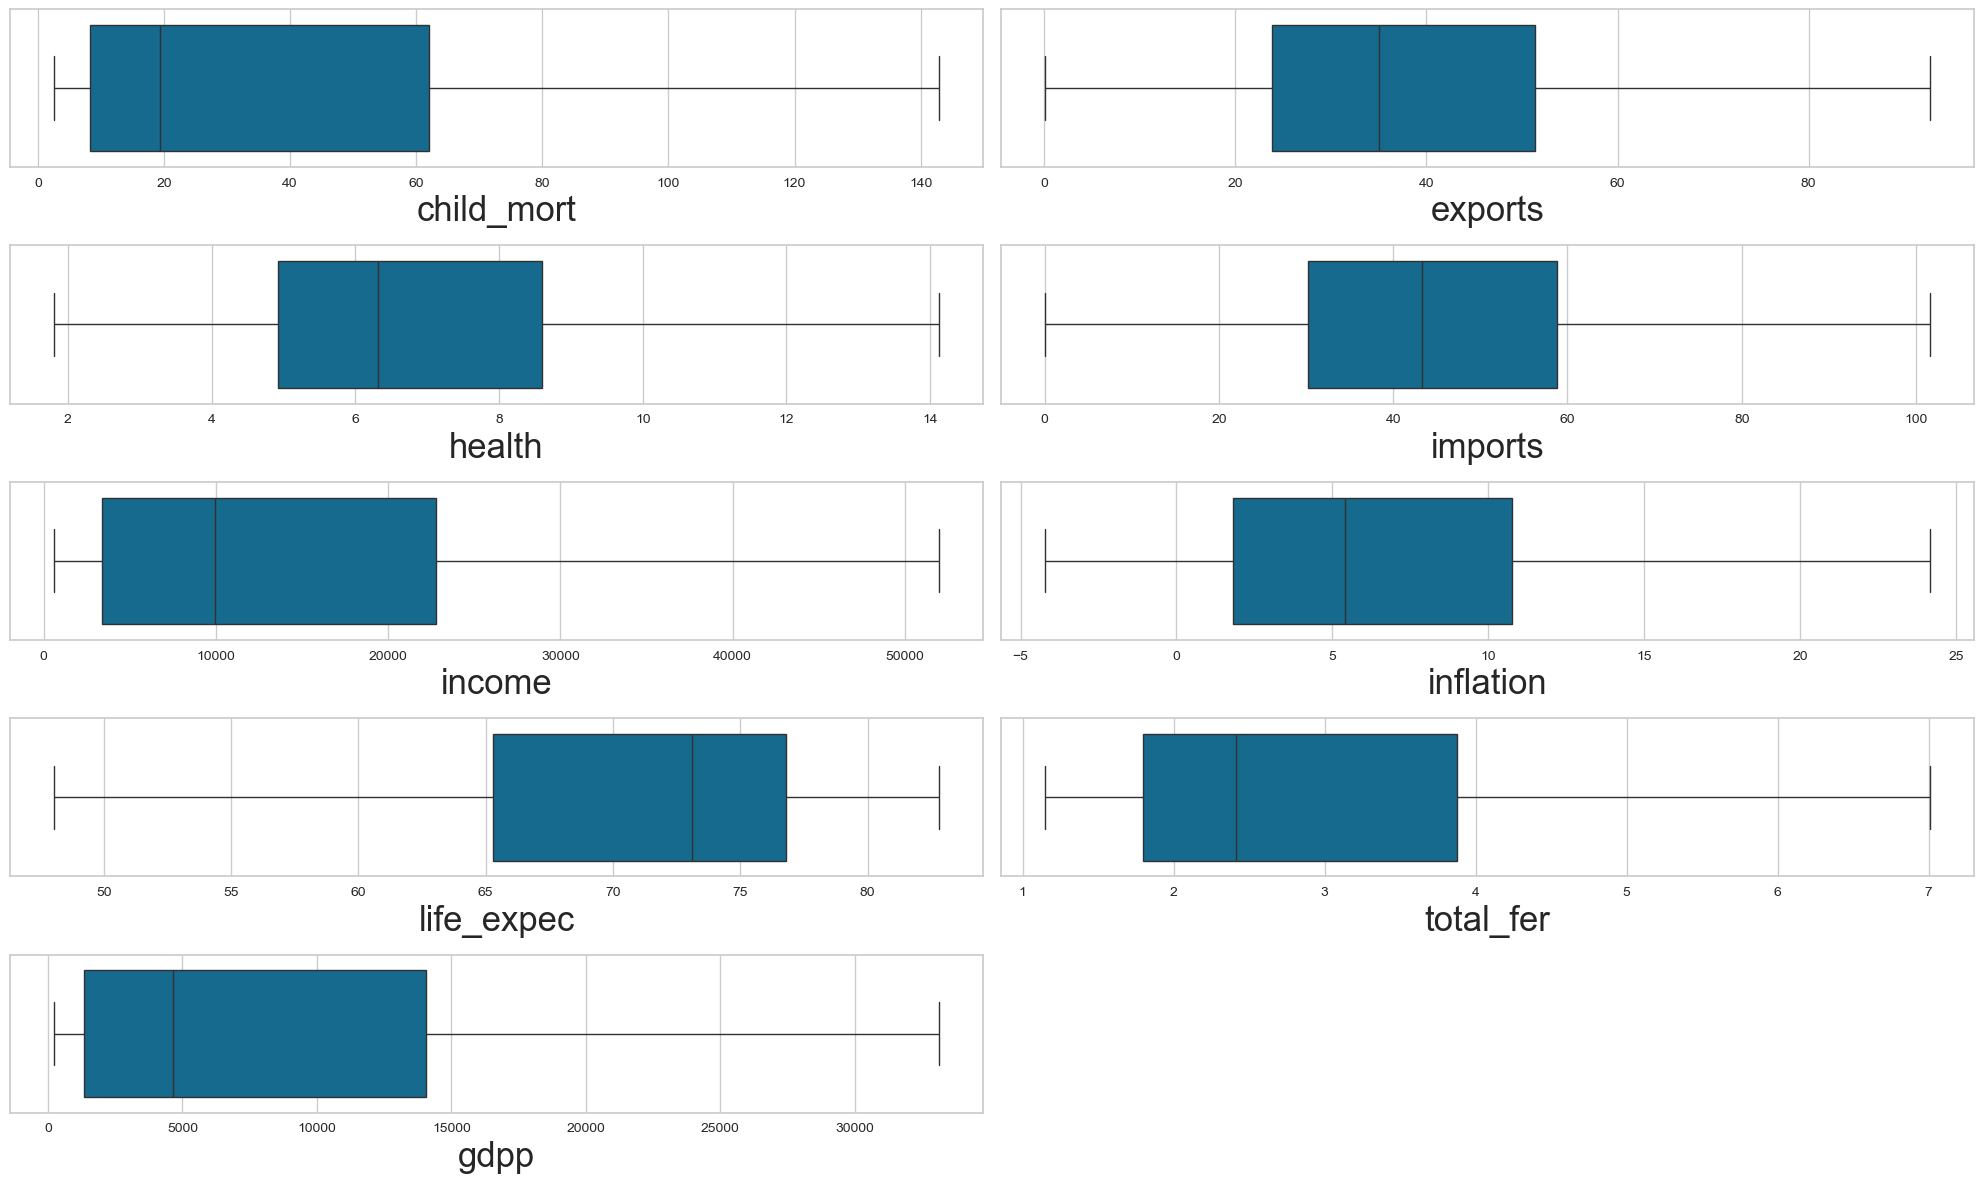

In [15]:
t=1
plt.figure(figsize=[20,12])
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data[i],orient='h')
    plt.xlabel(xlabel=i, fontsize=25)
    t+=1
plt.tight_layout()
plt.show()

### WE HAVE TO SCALE THE DATA 

In [16]:
sc=StandardScaler()

In [17]:
data_s=sc.fit_transform(data)
data_s=pd.DataFrame(data_s,columns=data.columns,index=data.index)

In [18]:
data_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


# PCA -(`Pricipal Component Analysis`)

**FOR BETTER CLUSTERS AND BETTER VISULALIZATION**

In [19]:
pca=PCA(n_components=9)

In [20]:
pca.fit(data_s)

PCA(n_components=9)

#### LETS USE `%OF EXPLAINE DVARIENCE` TO DECIDE THE NO OF PC'S

In [21]:
pca.explained_variance_

array([4.42682241, 1.48967656, 1.24556933, 0.86056285, 0.58855308,
       0.18215655, 0.14992503, 0.08143967, 0.02951139])

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
       0.97118734, 0.98774592, 0.99674059, 1.        ])

**SO WE GO WITH 95% VARIENCE EXPLAINED**
* we have to take 5 features

**FINAL PCA MODEL**

In [23]:
pca_final=PCA(n_components=5)

In [24]:
pca_final.fit_transform(data_s)

array([[-3.17791739, -0.25129181, -1.01147443,  0.7788036 , -0.01410225],
       [ 0.43497891, -0.21870044, -0.29259067, -1.39124146,  0.15671135],
       [-0.41678395, -0.61386957,  1.6378586 , -0.61502149,  0.53660386],
       [-3.30640928,  1.06664902,  2.15121921,  1.69867748,  0.16055053],
       [ 1.25324554,  0.54777809, -0.13695509, -0.71688976, -0.39462818],
       [-0.02863318, -2.167692  ,  1.04348335, -0.03425022,  1.65971957],
       [-0.20234308, -0.38655563,  0.38794079, -1.63906854,  0.03989662],
       [ 2.65113941, -2.24611465, -0.40630117,  0.64381417, -0.73810242],
       [ 3.4103729 , -0.51021485, -0.82446349,  1.13265715,  0.00403643],
       [-0.21601788, -0.51968515,  1.30455864, -0.15486772,  0.43280187],
       [ 1.77090845, -0.55463675, -0.70399729,  0.14162776, -0.69480284],
       [ 2.08271077,  0.61947445,  1.37207015,  0.60333027, -0.39161565],
       [-1.27343374, -1.12094345,  0.56409882, -1.44233203, -0.64315842],
       [ 1.36687295, -0.1059923 , -0.7

In [25]:
pca_data=pca_final.fit_transform(data_s)

In [26]:
pca_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data_s.index)

In [27]:
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
Vanuatu,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
Venezuela,-0.240053,-1.742315,2.238331,-0.080500,1.318475
Vietnam,0.305579,2.152785,0.455745,-0.746171,1.383759


# NOW IMPLEMENT CLUSTERING

### K-MEANS CLUSTERING

* ELBOW-VISUALIZER

In [28]:
kelbow=KElbowVisualizer(KMeans(),k=10)

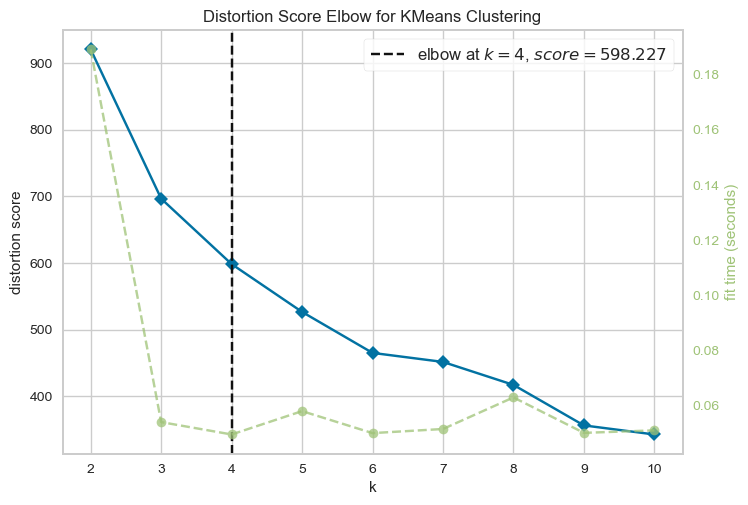

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
kelbow.fit(pca_data)
kelbow.show()

##### SILIHOUTTE VISUALIZER

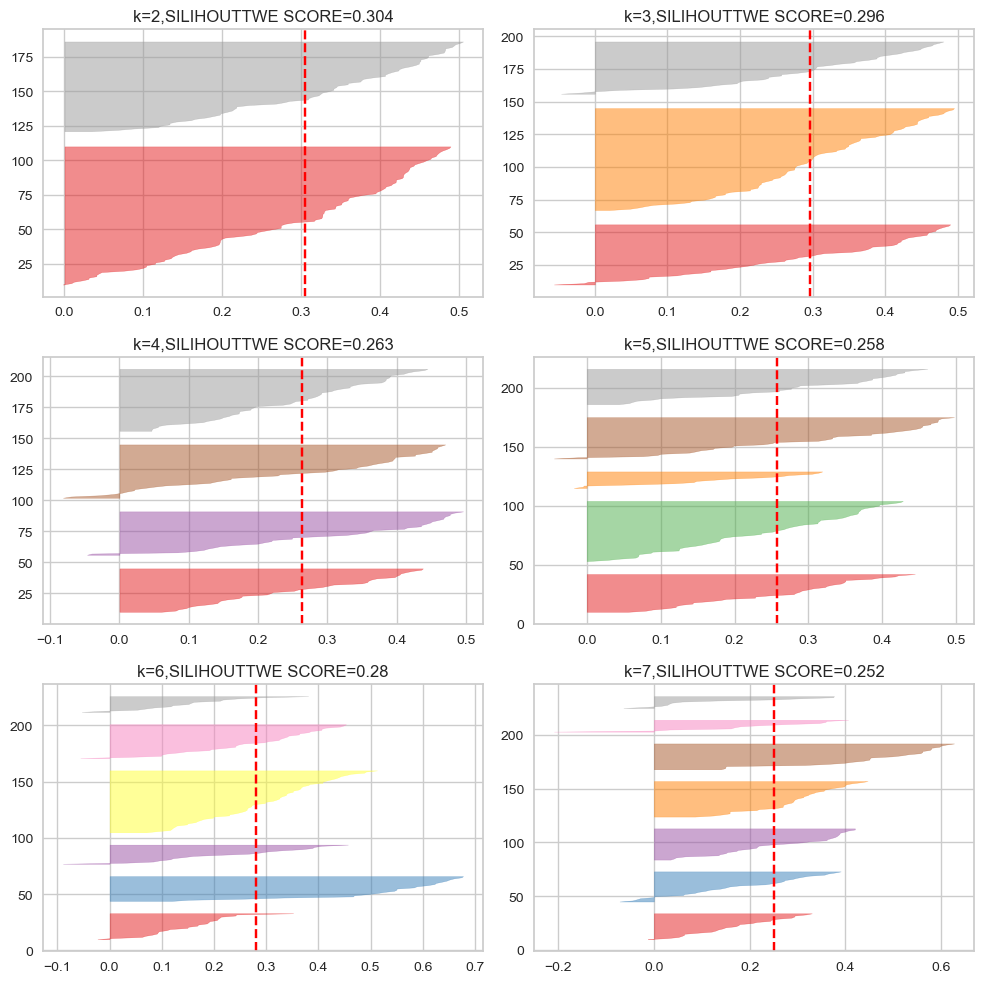

In [30]:
t=1
plt.figure(figsize=[10,10])
for i in range(2,8):
    plt.subplot(3,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title(f'k={i},SILIHOUTTWE SCORE={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

**LETS GO WITH K=2 OR K=3**

###### Reason
**K=2**
* BETTER SILIHOUTTE SCORE
* better density of clustures
*  NO Outliers
  
**`K=3`**
* In this WE HAVE 1-MORE CLUTSURE IN BETWEEN WHICH WILL BW SUB-CLUSTURE OF 2-CLUSTURES

**FINAL K-MEANS CLUSTERING**

In [31]:
kmean=KMeans(n_clusters=3,random_state=1)
kmean_label= kmean.fit_predict(pca_data)

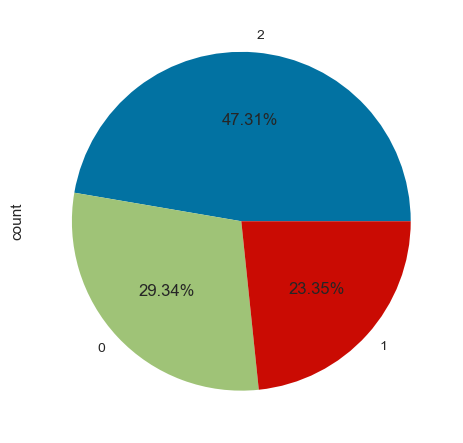

In [32]:
pd.Series(kmean_label).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

**CENTROID BASED KMEANS**

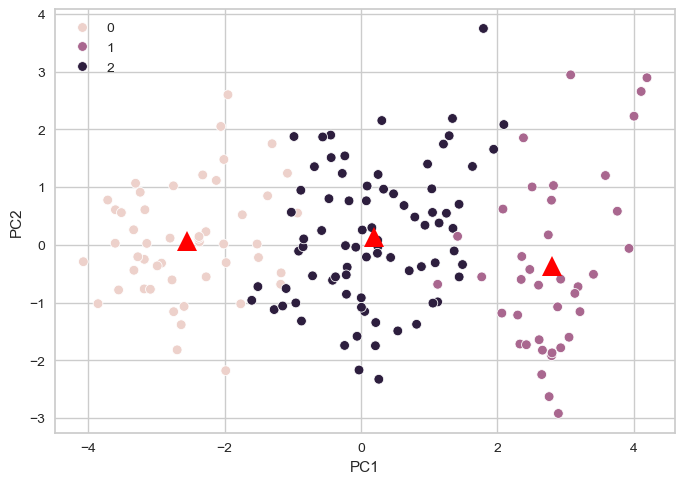

In [33]:
centroid=kmean.cluster_centers_
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label)
for i in range(3):
    plt.plot(centroid[i][0],centroid[i][1],marker='^',ms=15,color='red')
plt.show()

### AGGLOROMATIVE CLUSTERING

In [34]:
dist_mat=euclidean_distances(pca_data)
link_mat=linkage(data_s,method='ward')

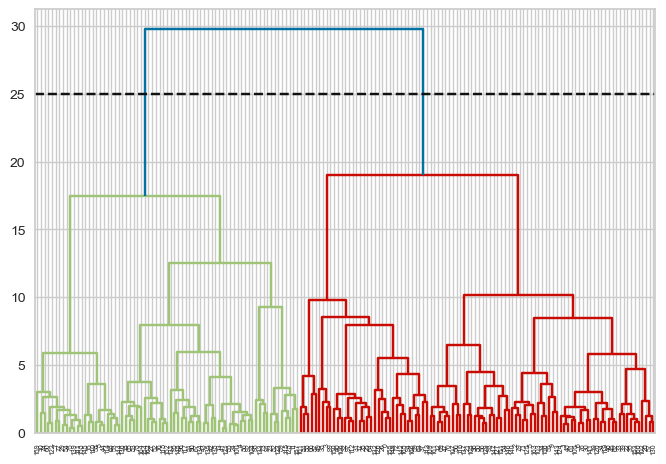

In [35]:
dendrogram(link_mat)
plt.axhline(y=25,ls='--',color='k')
plt.show()

**we can go with `wards linkage` maethod where k=3**

In [36]:
agglo=AgglomerativeClustering(n_clusters=3)

In [37]:
agglo_label=agglo.fit_predict(pca_data)
print('SILIHOUTTE SCORE:',round(silhouette_score(pca_data,agglo_label),3))

SILIHOUTTE SCORE: 0.246


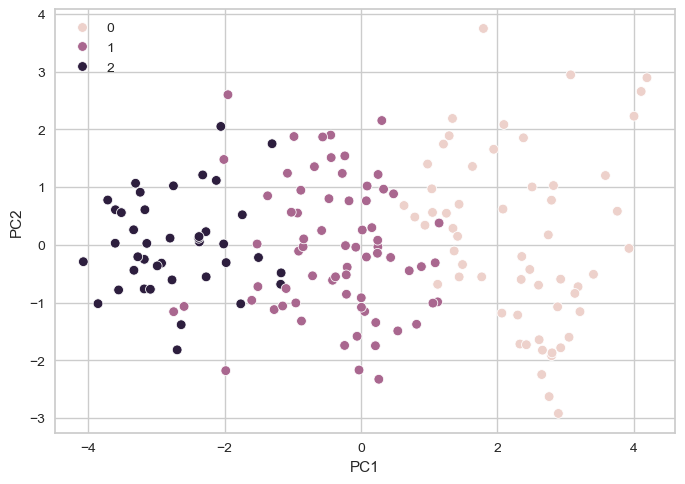

In [38]:
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=agglo_label)
plt.show()

# `FINAL MODEL` &  `BUSSINESS INTERPRETATION `

**BOTH THE MODELS GIVE BEST SILHOUTTE SCORE AT K=3 AND WITH APPROX SAME SCORE :-**
* So we go with `K-MEANS IS GOOD MODEL` FOR THIS *INSTEAD OF* `AGGLOROMATIVE BECAUSE IT IS BETTER FOR HIERARCHICHAL` DATA

In [39]:
data['LABEL']=kmean_label

**BUSSIENSS INTERPRRETATION**

In [40]:
data.groupby(by='LABEL').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
LABEL,,,,,,,,,
0,89.602041,28.267735,6.290000,41.793182,3900.469388,10.235612,59.923469,4.914643,1879.142857
1,5.671795,51.400000,8.416667,46.316026,39834.358974,3.296718,79.733333,1.815897,29744.871795
2,21.315190,40.684241,6.302532,48.161709,11572.658228,6.958848,72.848101,2.280886,6032.101266


* 0--->UNDER_DEVELOPED COUNTRY
* 1--->DEVELOPED COUNTRY
* 2--->DEVELOPING COUNTRY

#### GIVE LABEL TO THE DATA

In [41]:
data['LABEL']=data['LABEL'].map({0:'UNDER_DEVELOPED_COUNTRY',1:'DEVELOPED_COUNTRY',2:'DEVELOPING_COUNTRY'})

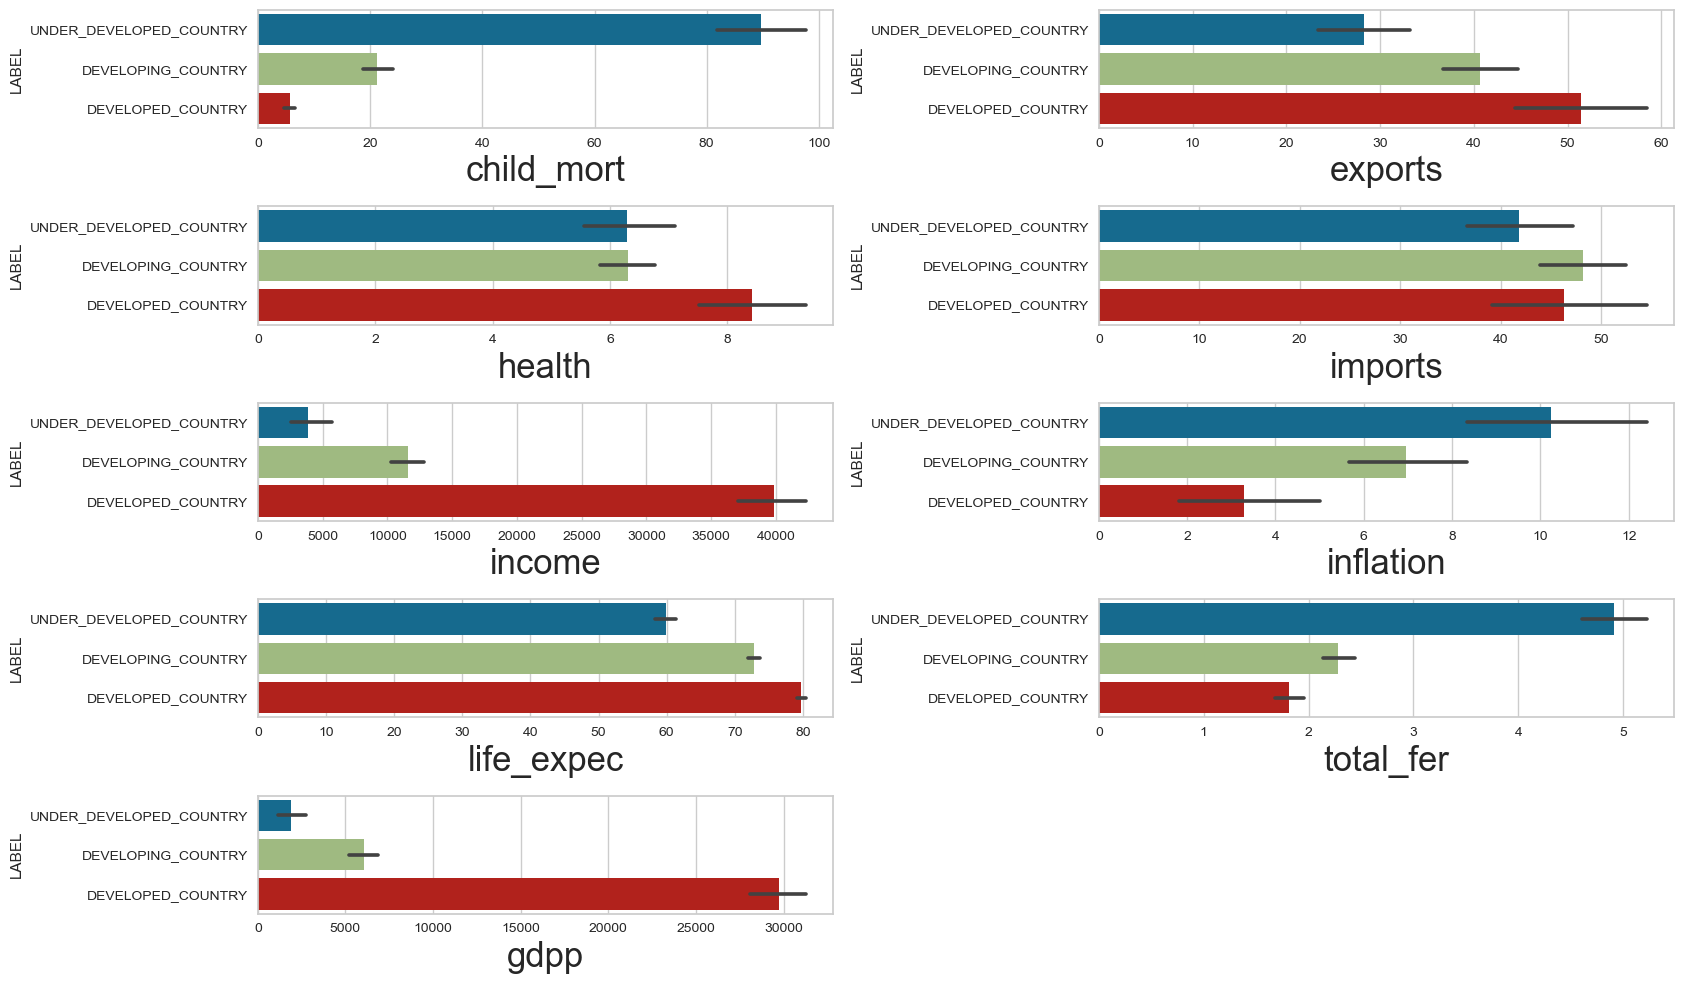

In [42]:
t=1
plt.figure(figsize=[17,10])
for i in data.columns:
    if i!='LABEL':
        plt.subplot(5,2,t)
        sns.barplot(data,y='LABEL',x=i,hue='LABEL')
        plt.xlabel(xlabel=i, fontsize=25)
        t+=1
plt.tight_layout()
plt.show()

#####  ALL UNDER-DEVELOPED COUNTRIES

In [43]:
data[data['LABEL']=='UNDER_DEVELOPED_COUNTRY'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

#### ALL DEVELOPED -COUNTRIES

In [44]:
data[data['LABEL']=='DEVELOPED_COUNTRY'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

#### DEVELOPING COUNTRIES

In [45]:
data[data['LABEL']=='DEVELOPING_COUNTRY'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand',
       'Tonga', 'Tunisia', 'Turkey

## WORLD MAP :

In [46]:
import plotly.express as px

* CRATE A DATA OF COUNTRY AND LABEL

In [57]:
world_data=pd.DataFrame({'LABEL':data['LABEL']})

In [58]:
world_data.reset_index(inplace=True)

In [59]:
world_data

,country,LABEL
0,Afghanistan,UNDER_DEVELOPED_COUNTRY
1,Albania,DEVELOPING_COUNTRY
2,Algeria,DEVELOPING_COUNTRY
3,Angola,UNDER_DEVELOPED_COUNTRY
4,Antigua and Barbuda,DEVELOPING_COUNTRY
...,...,...
162,Vanuatu,DEVELOPING_COUNTRY
163,Venezuela,DEVELOPING_COUNTRY
164,Vietnam,DEVELOPING_COUNTRY
165,Yemen,UNDER_DEVELOPED_COUNTRY


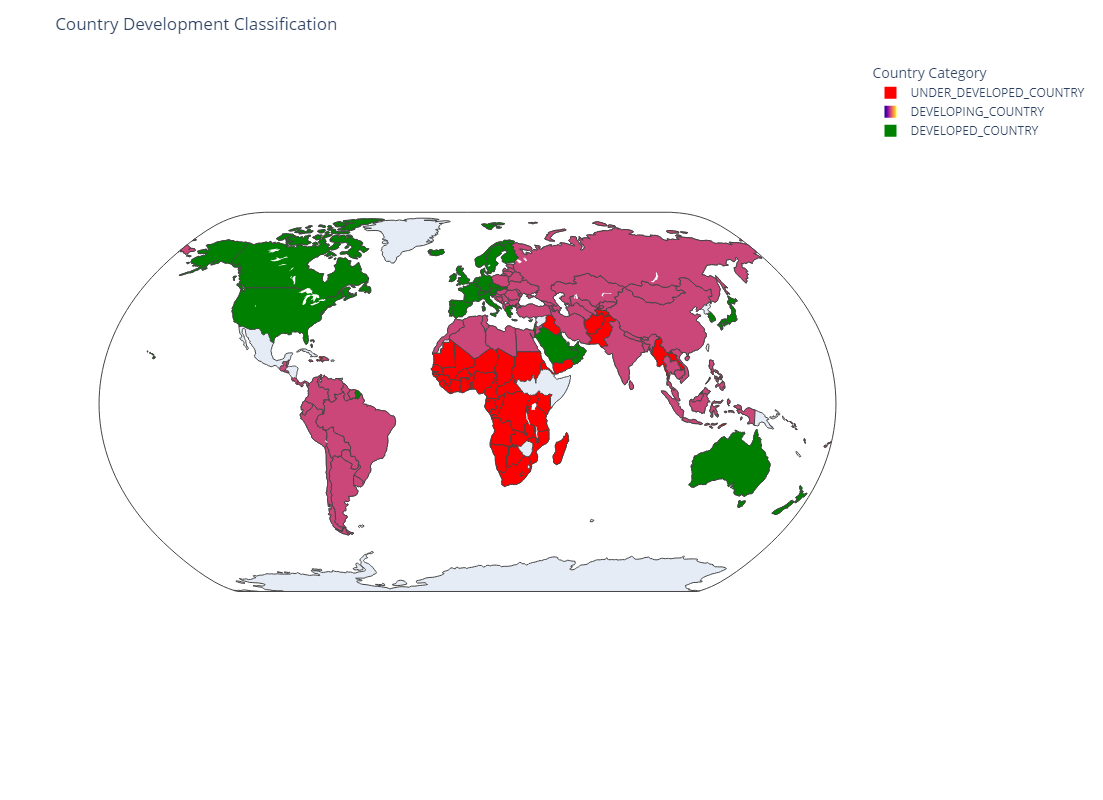

In [77]:
FIG = px.choropleth(
    data_frame=world_data,
    locationmode='country names',
    locations='country',
    labels={'LABEL':'Country Category'},
    color='LABEL',
    color_discrete_map={
        'DEVELOPED_COUNTRY': 'green',
        'UNDER_DEVELOPED_COUNTRY': 'red',
        'DEVELOPING_COUNTRY': 'Light blue'},width=1300,height=800)
FIG.update_geos(projection_type='natural earth')
FIG.update_layout(title='Country Development Classification')
FIG.show()

###### ANALYSED BY `AMRENDRA-SINGH`